Bank Marketing Dataset
This model will assist banks in making optimal choices when determining their demographic, thereby saving resources that would have gone toward unnecessary marketing

In [10]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [12]:
bank = pd.read_csv('bank-additional-full-proj.csv', sep = ';')
bank = bank.rename(columns = {'y': 'deposit'})
bank = bank.drop(columns = ['day_of_week','emp.var.rate','cons.price.idx','cons.conf.idx', 'nr.employed','euribor3m'])
for i in range(len(bank)):
    if bank['deposit'][i] == 'yes':
        bank['deposit'][i] = 1
    else:
        bank['deposit'][i] = 0

In [13]:
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,0
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,0
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,0
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,0


## 1. Data Cleaning and Merging into a single dataset

In [14]:
bank['DATE'] = None

In [15]:
# Importing FRED data 
# Gross domestic product, consumer price index, inflation rates, and unemployment rates
gdp = pd.read_csv(r'gdp.csv')
cpi = pd.read_csv(r'cpi.csv')
inflation = pd.read_csv(r'inflation.csv')
unemp_rate = pd.read_csv(r'unemployment_rate.csv')

In [16]:
import calendar
newdf = pd.merge(gdp, cpi, on = 'DATE')
newdf = newdf.merge(inflation, on = 'DATE')
newdf = newdf.merge(unemp_rate, on = 'DATE')
temp = newdf['DATE'].str.split('-', expand = True)
newdf['YEAR'] = temp[0]
newdf['MONTH'] = temp[1]
newdf['MONTH'] = newdf['MONTH'].astype('str')
newdf['newMonth'] = None
for i in range(len(newdf['MONTH'])):
  if newdf['MONTH'][i] == '01':
    newdf['newMonth'][i] = 'jan'
  if newdf['MONTH'][i] == '02':
    newdf['newMonth'][i] = 'feb'
  if newdf['MONTH'][i] == '03':
    newdf['newMonth'][i] = 'mar'
  if newdf['MONTH'][i] == '04':
    newdf['newMonth'][i] = 'apr'
  if newdf['MONTH'][i] == '05':
    newdf['newMonth'][i] = 'may'
  if newdf['MONTH'][i] == '06':
    newdf['newMonth'][i] = 'jun'
  if newdf['MONTH'][i] == '07':
    newdf['newMonth'][i] = 'jul'
  if newdf['MONTH'][i] == '08':
    newdf['newMonth'][i] = 'aug'
  if newdf['MONTH'][i] == '09':
    newdf['newMonth'][i] = 'sep'
  if newdf['MONTH'][i] == '10':
    newdf['newMonth'][i] = 'oct'
  if newdf['MONTH'][i] == '11':
    newdf['newMonth'][i] = 'nov'
  if newdf['MONTH'][i] == '12':
    newdf['newMonth'][i] = 'dec'
newdf['newDate'] = newdf['newMonth'] + ' ' + newdf['YEAR']
newdf.head(5)


,DATE,GDP,CORESTICKM159SFRBATL,T10YIE,UNRATE,YEAR,MONTH,newMonth,newDate
0,2008-05-01,14865.701,2.793742,2.420000,5.4,2008,05,may,may 2008
1,2008-06-01,14865.701,2.937696,2.470952,5.6,2008,06,jun,jun 2008
2,2008-07-01,14898.999,3.014254,2.438636,5.8,2008,07,jul,jul 2008
3,2008-08-01,14898.999,3.084506,2.209524,6.1,2008,08,aug,aug 2008
4,2008-09-01,14898.999,3.076678,1.836190,6.1,2008,09,sep,sep 2008


In [17]:
years = []
currYear = 2008
prep = True
for i in range(len(bank)):
  if bank['month'].values[i - 1] == 'dec' and bank['month'].values[i] != 'dec' :
    currYear += 1
  years.append(currYear)

In [18]:
bank['DATE'] = years
bank['DATE'] = bank['DATE'].astype('str')
newdf['YEAR'] = newdf['YEAR'].astype('str')
bank['newDate'] = bank['month'] + ' ' + bank['DATE']
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,deposit,DATE,newDate
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,0,2008,may 2008
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,0,2008,may 2008
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,0,2008,may 2008
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,0,2008,may 2008
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,0,2008,may 2008


In [19]:
bank = bank.merge(newdf, left_on = 'newDate', right_on = 'newDate')
bank = bank.rename(columns = {'GDP': 'gross domestic product', 'CORESTICKM159SFRBATL': 'consumer_price_index', 'T10YIE': 'inflation_rate', 'UNRATE': 'unemployment_rate', 'education_basic.4y': 'education_basic_4y',
       'education_basic.6y': 'education_basic_6y', 'education_basic.9y': 'education_basic_9y', 'education_high.school': 'education_high_school',
       'education_professional.course': 'education_professional_course',  'education_university.degree':  'education_university_degree'})
bank = bank.drop(columns = ['DATE_x', 'DATE_y', 'newMonth', 'MONTH', 'YEAR', 'month'])
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit,newDate,gross domestic product,consumer_price_index,inflation_rate,unemployment_rate
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,999,0,nonexistent,0,may 2008,14865.701,2.793742,2.42,5.4
1,57,services,married,high.school,unknown,no,no,telephone,149,1,999,0,nonexistent,0,may 2008,14865.701,2.793742,2.42,5.4
2,37,services,married,high.school,no,yes,no,telephone,226,1,999,0,nonexistent,0,may 2008,14865.701,2.793742,2.42,5.4
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,999,0,nonexistent,0,may 2008,14865.701,2.793742,2.42,5.4
4,56,services,married,high.school,no,no,yes,telephone,307,1,999,0,nonexistent,0,may 2008,14865.701,2.793742,2.42,5.4


In [20]:
bank['deposit'].value_counts()

0    36548
1     4640
Name: deposit, dtype: int64

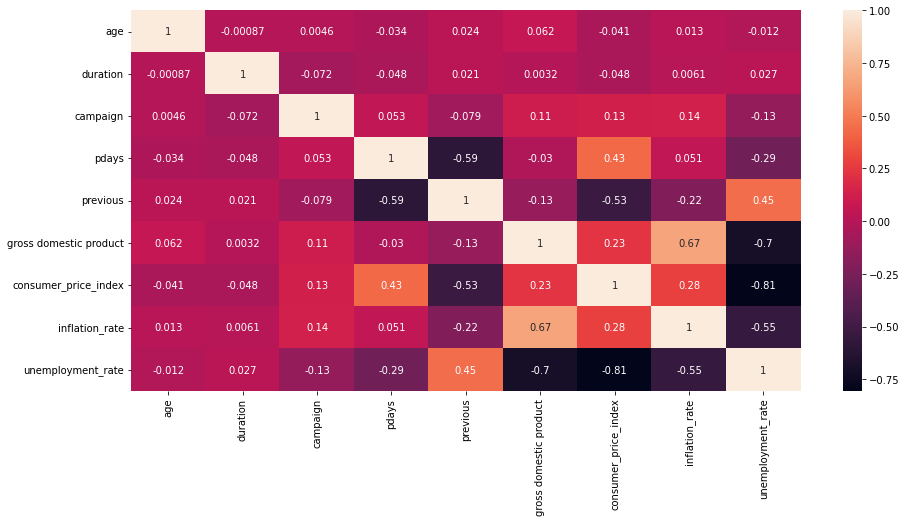

In [21]:
#Correlation between numerical features

## Checking for correlation
cor_matrix=bank.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_matrix,annot=True)

In [22]:
X = bank.drop(columns = ['deposit'])
X = pd.get_dummies(X)
y = bank['deposit']

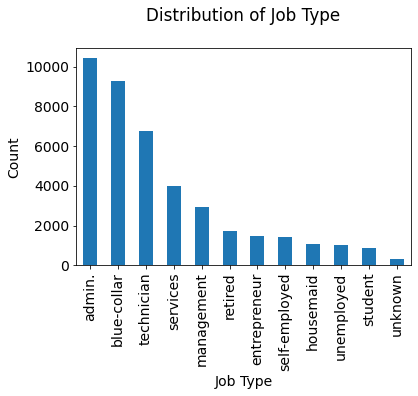

In [23]:
plt.rc("font",size=14)
plt.title('Distribution of Job Type\n')
bank.job.value_counts(sort=True).plot(kind='bar')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

In [24]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous',
       'gross domestic product', 'consumer_price_index', 'inflation_rate',
       'unemployment_rate', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'newDate_apr 2009',
       'newDate_apr

In [25]:
# Dropping columns with unknown values
# This step of preprocessing is also essential so that when we are calculating the VIF factors (below), we do not end up with perfect correlation for each column we used get_dummies() on
X = X.drop(columns = ['newDate_apr 2009', 'gross domestic product',
       'newDate_apr 2010', 'newDate_aug 2008', 'newDate_aug 2009',
       'newDate_aug 2010', 'newDate_dec 2008', 'newDate_dec 2009',
       'newDate_jul 2008', 'newDate_jul 2009', 'newDate_jul 2010',
       'newDate_jun 2008', 'newDate_jun 2009', 'newDate_jun 2010',
       'newDate_mar 2009', 'newDate_mar 2010', 'newDate_may 2008',
       'newDate_may 2009', 'newDate_may 2010', 'newDate_nov 2008',
       'newDate_nov 2009', 'newDate_nov 2010', 'newDate_oct 2008',
       'newDate_oct 2009', 'newDate_oct 2010', 'newDate_sep 2009',
       'newDate_sep 2010','loan_yes','loan_no','housing_yes','contact_cellular', 'contact_telephone','marital_single','marital_divorced','marital_married','housing_no', 'job_unknown', 'education_unknown', 'housing_unknown', 'loan_unknown', 'marital_unknown','default_unknown', 'poutcome_nonexistent'])

In [26]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous',
       'consumer_price_index', 'inflation_rate', 'unemployment_rate',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no', 'default_yes',
       'poutcome_failure', 'poutcome_success'],
      dtype='object')

In [27]:
y.value_counts()

0    36548
1     4640
Name: deposit, dtype: int64

In [28]:
## calculate Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_scores = pd.DataFrame() 
vif_scores["Attribute"] = X.columns 
  
# calculating VIF for each feature 
vif_scores["VIF Scores"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 

In [29]:
vif_scores

,Attribute,VIF Scores
0,age,21.563010
1,duration,2.007066
2,campaign,1.923985
3,pdays,210.603038
4,previous,5.821955
5,consumer_price_index,59.483043
6,inflation_rate,18.472569
7,unemployment_rate,50.807968
8,job_admin.,29.931611
9,job_blue-collar,26.495130


In [30]:
# Once we have the VIF values of each column, we can use the general rule of thumb which is to drop columns which have > 

### 2. Modeling

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

**2.1 Baseline**

In [32]:
#Baseline ----> predict no 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
y_test.value_counts()
no = y_test.value_counts()[0]
yes = y_test.value_counts()[1]
# print(no)
# print(yes)
baseline = no / (no + yes)
print("The baseline for our model is" + " " +   str(baseline))

The baseline for our model is 0.8869270948282204


In [33]:
X_test

,age,duration,campaign,pdays,previous,consumer_price_index,inflation_rate,unemployment_rate,job_admin.,job_blue-collar,...,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,poutcome_failure,poutcome_success
32884,57,371,1,999,1,2.288829,1.576000,9.4,0,0,...,0,0,1,0,0,0,1,0,1,0
3169,55,285,2,999,0,2.793742,2.420000,5.4,0,0,...,0,0,0,0,0,0,0,0,0,0
32206,33,52,1,999,1,2.288829,1.576000,9.4,0,1,...,0,1,0,0,0,0,1,0,1,0
9403,36,355,4,999,0,2.937696,2.470952,5.6,1,0,...,0,0,1,0,0,0,1,0,0,0
14020,27,189,2,999,0,3.014254,2.438636,5.8,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,46,232,1,999,0,2.793742,2.420000,5.4,0,0,...,0,0,0,0,0,0,0,0,0,0
24479,57,168,2,999,0,2.786462,0.638333,6.8,0,0,...,0,0,0,0,1,0,1,0,0,0
14673,50,98,2,999,0,3.014254,2.438636,5.8,0,0,...,0,0,0,0,0,1,1,0,0,0
20582,54,136,5,999,0,3.084506,2.209524,6.1,0,0,...,0,0,1,0,0,0,1,0,0,0


**2.2 Logistic Regression**

In [34]:
#sklearn logistic regression model for scalability 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2]) 
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)


[[11784   272]
 [  940   597]]
Accuracy is: 0.9108
TPR is: 0.3884
FPR is: 0.0226


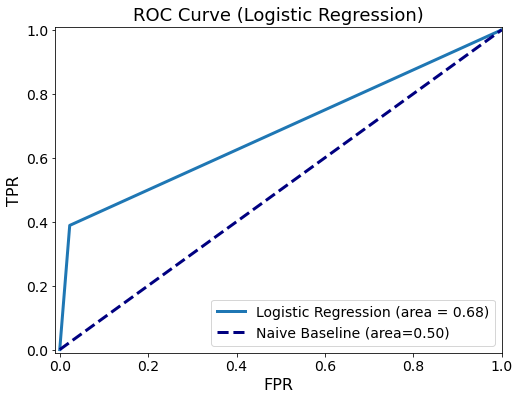

In [35]:
y_prob = logisticRegr.predict(X_test)
FPR, TPR, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(FPR,TPR)

plt.figure(figsize=(8,6))
plt.title('ROC Curve (Logistic Regression)', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(FPR, TPR, lw=3, label ='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area=0.50)')
plt.legend(loc ='lower right', fontsize=14)
plt.show()

**2.3 Decision Tree Classifier**

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42) 
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
dtc_acc = accuracy_score(y_test, y_pred)
dtc_PRE = precision_score(y_test, y_pred)
dtc_TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
dtc_FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])

print ("Confusion Matrix: \n", cm)
print('Accuracy is: %.4f' % dtc_acc)
print('Precision:is: %.4f' % dtc_PRE)
print('TPR is: %.4f' % dtc_TPR)
print('FPR is: %.4f' % dtc_FPR)

Confusion Matrix: 
 [[11238   818]
 [  749   788]]
Accuracy is: 0.8847
Precision:is: 0.4907
TPR is: 0.5127
FPR is: 0.0679


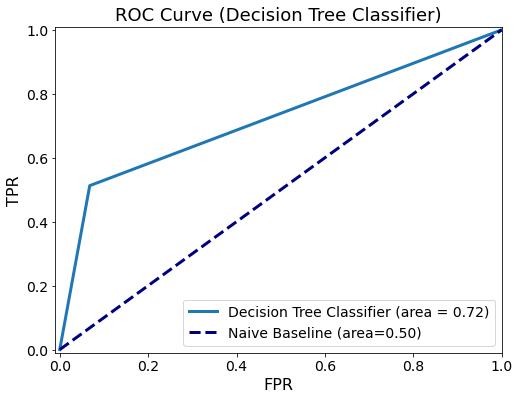

In [38]:
y_prob = dtc.predict(X_test)
FPR, TPR, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(FPR,TPR)
plt.figure(figsize=(8,6))
plt.title('ROC Curve (Decision Tree Classifier)', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(FPR, TPR, lw=3, label ='Decision Tree Classifier (area = {:0.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area=0.50)')
plt.legend(loc ='lower right', fontsize=14)
plt.show()

**2.4 Random Forest**

In [39]:
rfModel = RandomForestClassifier()
rfModel.fit(X_train, y_train)
# if test acc > train acc -> != good
# get validation set, find the peak point, create validation set, try to vary the RF size. How does the validation acc change as u increase/ decrease complexity (hyperparameter tuning)
predictions = rfModel.predict(X_test)
predictions_train = rfModel.predict(X_train)

accuracy = accuracy_score(y_test, predictions)
accuracy_train = accuracy_score(y_train, predictions_train)
print(accuracy)

cm = confusion_matrix(y_test, predictions)
cm_train = confusion_matrix(y_train, predictions_train)

print(cm)
acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
acc_train = (cm_train.ravel()[0]+cm_train.ravel()[3])/sum(cm_train.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2]) 
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('Testing Accuracy is: %.4f' %acc)
print('Training Accuracy is: %.4f' %acc_train)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)


0.909144412565291
[[11589   467]
 [  768   769]]
Testing Accuracy is: 0.9091
Training Accuracy is: 0.9999
TPR is: 0.5003
FPR is: 0.0387


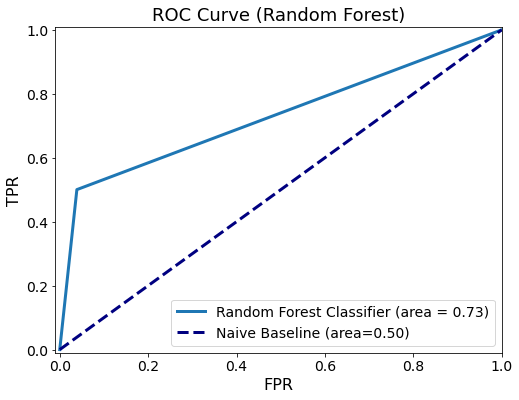

In [40]:

y_prob = rfModel.predict(X_test)
FPR, TPR, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(FPR,TPR)

plt.figure(figsize=(8,6))
plt.title('ROC Curve (Random Forest)', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(FPR, TPR, lw=3, label ='Random Forest Classifier (area = {:0.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area=0.50)')
plt.legend(loc ='lower right', fontsize=14)
plt.show()


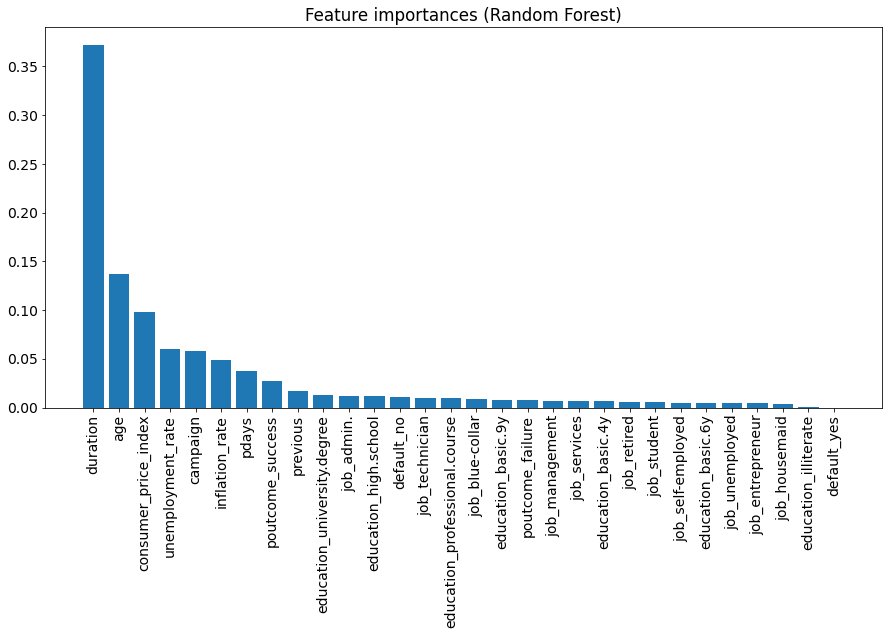

In [41]:
#get feature importances from the model. We can see that duration and age are the most important features!
headers = ["name", "score"]
values = sorted(zip(X_train.columns, rfModel.feature_importances_), key=lambda x: x[1] * -1)
rF_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(rF_feature_importances))
plt.bar(x_pos, rF_feature_importances['score'])
plt.xticks(x_pos, rF_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (Random Forest)')

plt.show()

**2.5 Neural Networks**

In [42]:
#Neural Network using MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [43]:
clf = MLPClassifier(hidden_layer_sizes = (10), activation = 'logistic',
                    solver = 'lbfgs', verbose = 1, random_state = 42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print(accuracy_score(y_train, y_pred))

0.8994020655915926


In [44]:
#Normalizing the data to see if the model performs better 
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = (10), activation = 'logistic', 
                    solver = 'lbfgs', verbose = 1, random_state = 42)

clf.fit(X_train_scaled, y_train)
sc_y_train_pred = clf.predict(X_train_scaled)
sc_y_test_pred = clf.predict(X_test_scaled)
print(accuracy_score(y_train, sc_y_train_pred))
print(accuracy_score(y_test, sc_y_test_pred))

cm_train = confusion_matrix(y_train, sc_y_train_pred)
cm_test = confusion_matrix(y_test, sc_y_test_pred)

print ("Confusion Matrix Training: \n", cm_train) 

acc = (cm_train.ravel()[0]+cm_train.ravel()[3])/sum(cm_train.ravel())
TPR = cm_train.ravel()[3]/(cm_train.ravel()[3]+cm_train.ravel()[2])
FPR = cm_train.ravel()[1]/(cm_train.ravel()[1]+cm_train.ravel()[0])
print('Accuracy for training dataset is: %.4f' %acc)
print('TPR for training dataset is: %.4f' % TPR)
print('FPR for training dataset is: %.4f' % FPR)

print ("Confusion Matrix Testing: \n", cm_test) 


acc = (cm_test.ravel()[0]+cm_test.ravel()[3])/sum(cm_test.ravel())
TPR = cm_test.ravel()[3]/(cm_test.ravel()[3]+cm_test.ravel()[2])
FPR = cm_test.ravel()[1]/(cm_test.ravel()[1]+cm_test.ravel()[0])
print('Accuracy for testing dataset is: %.4f' %acc)
print('TPR for testing dataset is: %.4f' % TPR)
print('FPR for testing dataset is: %.4f' % FPR)

0.9178474361297336
0.9075259324652395
Confusion Matrix Training: 
 [[23459  1033]
 [ 1234  1869]]
Accuracy for training dataset is: 0.9178
TPR for training dataset is: 0.6023
FPR for training dataset is: 0.0422
Confusion Matrix Testing: 
 [[11483   573]
 [  684   853]]
Accuracy for testing dataset is: 0.9075
TPR for testing dataset is: 0.5550
FPR for testing dataset is: 0.0475


**2.6 KNN**

In [45]:
# -----------------------------------K NEAREST NEIGHBOR MODEL ------------------------------------
kNNeighbors =KNeighborsClassifier()
kNNeighbors.fit(X_train,y_train)
KNNprediction =kNNeighbors.predict(X_test)
KNN_cm = confusion_matrix(y_test, KNNprediction)


In [46]:
print("Testing Accuracy Score for KNN: ",accuracy_score(y_test,KNNprediction))

Testing Accuracy Score for KNN:  0.8965644081512544


### 3. Optimized Models

**3.1 Logistic Regression tunned**

In [47]:
# different tunning approach of Logistic Regression Model
logreg_c = LogisticRegression(random_state=42, solver='newton-cg').fit(X_train, y_train)
y_prob = logreg_c.predict_proba(X_test)
logreg_precision = [0 for i in range(5)]
best_TPR = 0
best_threshold = 0
best_y_pred = None
best_acc = 0
best_PRE = 0

for i in np.linspace(0,1,99):
    y_new_pred = pd.Series([1 if x > i else 0 for x in y_prob[:, 1]], index=y_test.index)
    cm = confusion_matrix(y_test, y_new_pred)
    accuracy = accuracy_score(y_test, y_new_pred)
    precision = precision_score(y_test, y_new_pred)
    tn, fp, fn, tp = cm.ravel()
    TPR = tp/(tp+fn)
    if TPR > best_TPR and accuracy > 0.55:
        best_threshold = i
        best_acc = accuracy
        best_TPR = TPR
        best_PRE = precision 
        
print(f'The highest True Positive Rate of LogisticRegression model: {best_TPR:.4f}')
print(f'The highest Precision of LogisticRegression model: {best_PRE:.4f}')
print(f'The highest Accuracy of LogisticRegression model: {best_acc:.4f}')
print(f'The highest Threshold of LogisticRegression model: {best_threshold:.4f}')



The highest True Positive Rate of LogisticRegression model: 0.9909
The highest Precision of LogisticRegression model: 0.2267
The highest Accuracy of LogisticRegression model: 0.6168
The highest Threshold of LogisticRegression model: 0.0306


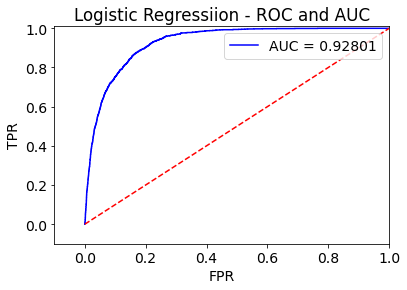

In [48]:

Y_response = logreg_c.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, Y_response)
roc_auc = auc(fpr,tpr)
plt.title('Logistic Regressiion - ROC and AUC')
plt.ylim([-0.1,1.01])
plt.plot(fpr, tpr, 'b',label='AUC = %0.5f'% roc_auc)
plt.legend(loc='upper right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

**3.3 Decision Tree Classifier Optimized**



In [49]:
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201)}
# method = KFold(n_splits=5, shuffle=True, random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
dtc_cv = GridSearchCV(dtc, param_grid = grid_values, cv=5, verbose=1,
                              scoring = 'accuracy')
dtc_cv.fit(X_train, y_train)

Fitting 5 folds for each of 201 candidates, totalling 1005 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0....
       0.072 , 0.0725, 0.073 , 0.0735, 0.074 , 0.0745, 0.075 , 0.0755,
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ])},
             scoring='ac

In [50]:
dtc_cv.best_params_

{'ccp_alpha': 0.0005}

In [51]:
# Decision Tree with the best parameters 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dtc_best = DecisionTreeClassifier(ccp_alpha = 0.0005, random_state = 42)
dtc_best.fit(X_train, y_train)
y_pred = dtc_best.predict(X_test)
print(len(y_pred))
print(len(y_test))
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm) 


acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)

13593
13593
Confusion Matrix : 
 [[11592   464]
 [  719   818]]
Accuracy is: 0.9130
TPR is: 0.5322
FPR is: 0.0385


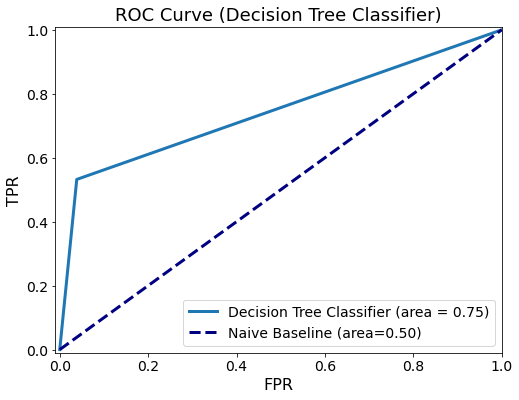

In [52]:
y_prob = dtc_best.predict(X_test)
FPR, TPR, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(FPR,TPR)
plt.figure(figsize=(8,6))
plt.title('ROC Curve (Decision Tree Classifier)', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(FPR, TPR, lw=3, label ='Decision Tree Classifier (area = {:0.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area=0.50)')
plt.legend(loc ='lower right', fontsize=14)
plt.show()


**3.4 Random Forest Optimized**

In [53]:
## CROSS VALIDATION - using GridSearchCV to find best max_features:

import time

grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [200],
               'random_state': [42]} 

tic = time.time()

rf2 = RandomForestClassifier(random_state=42)  
cv = KFold(n_splits=5, shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='accuracy', cv=cv,verbose=2)
rf_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=200, random_state=42; total time=   2.1s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=200, random_state=42; total time=   2.0s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=200, random_state=42; total time=   2.1s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=200, random_state=42; total time=   2.1s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=200, random_state=42; total time=   2.1s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=200, random_state=42; total time=   2.5s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=200, random_state=42; total time=   2.5s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=200, random_state=42; total time=   2.5s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=200, random_state=42; total time=   2.6s
[CV] END max_features=2, min_samples_leaf=5, n_e

In [54]:
print(rf_cv.best_params_['max_features'])



16


In [55]:
#best model
rf_optimal= RandomForestClassifier(max_features=16, random_state=42)
rf_optimal.fit(X_train, y_train)
y_pred_3 = rf_optimal.predict(X_test)
len(y_pred_3)


cm = confusion_matrix(y_test, y_pred_3)

print ("Confusion Matrix : \n", cm) 


acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)


Confusion Matrix : 
 [[11558   498]
 [  732   805]]
Accuracy is: 0.9095
TPR is: 0.5237
FPR is: 0.0413


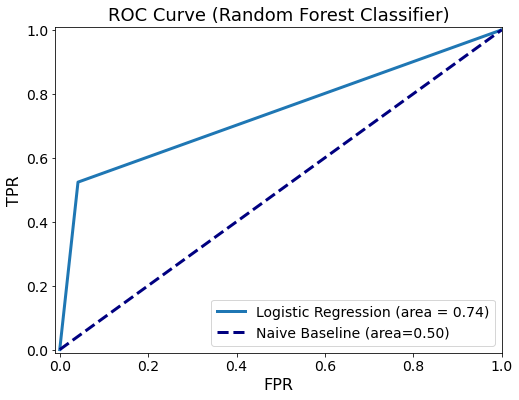

In [56]:
# ROC Curve for random forest
y_prob = rf_optimal.predict(X_test)
FPR, TPR, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(FPR,TPR)

plt.figure(figsize=(8,6))
plt.title('ROC Curve (Random Forest Classifier)', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(FPR, TPR, lw=3, label ='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area=0.50)')
plt.legend(loc ='lower right', fontsize=14)
plt.show()

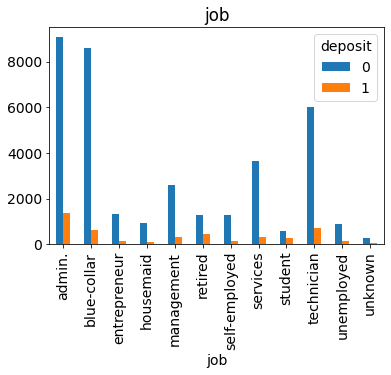

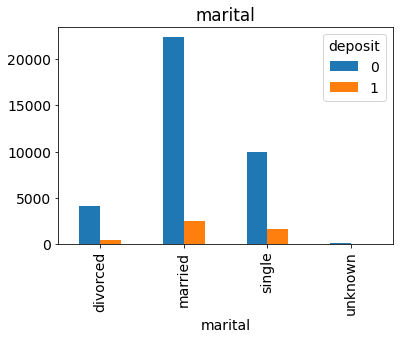

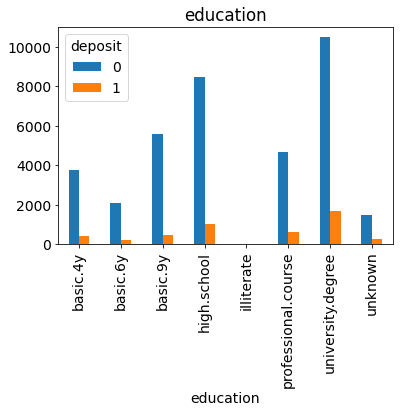

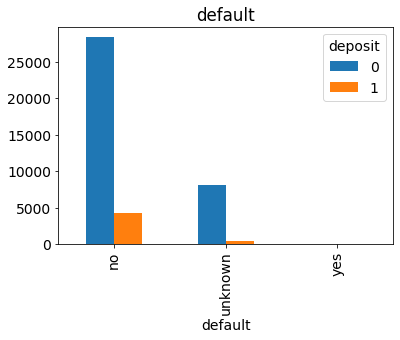

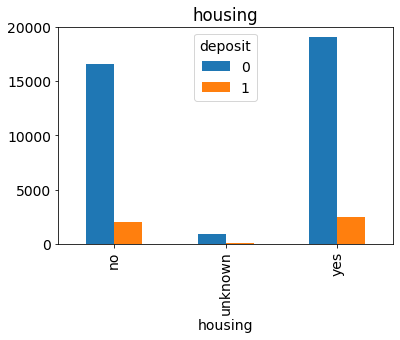

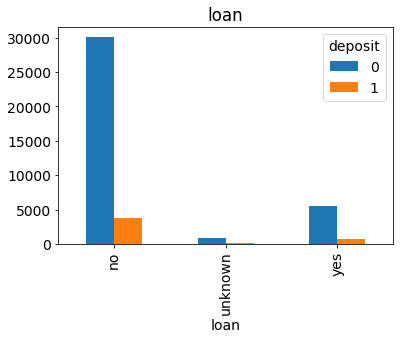

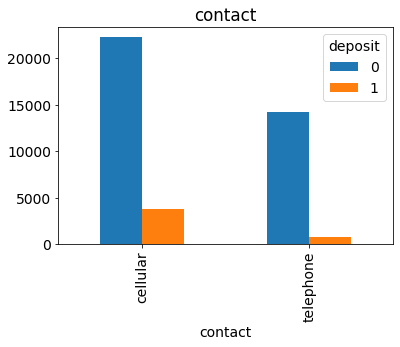

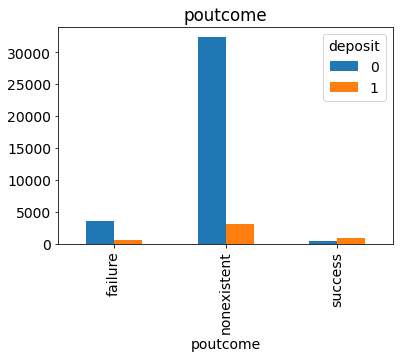

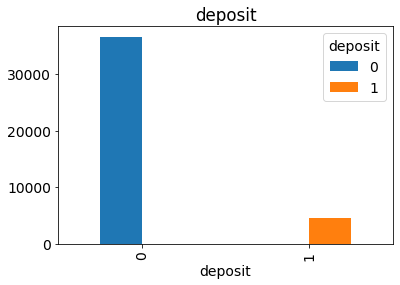

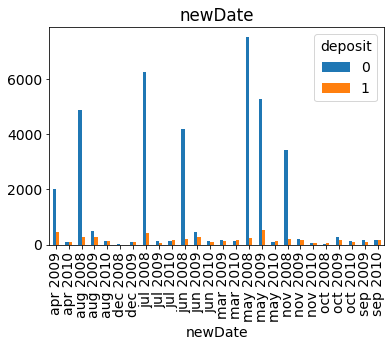

In [57]:
# -------------------------- VISUALS-----------------------------------
categories_for_visuals = [n for n in bank.columns if bank[n].dtypes == 'object']
for i in categories_for_visuals:
    pd.crosstab(bank[i], bank.deposit).plot(kind = 'bar')
    plt.title(i)

In [58]:
# Model Bootstrapping
name_holders = ['Random Forest', 'Random Forest Optimized', 'Logistic Regression', 'Logistic Regression tunned', 'Decision Tree Optimized', 'KNN', 'MLPClassifier']
def bootstrap_validation(test_data, test_label, train_label, model_list, sample=500, random_state=42):
    bootstrap_dict = {}
    
    n_sample = sample
    counter = 0
    for model in model_list:
        accuracyList = []
        for bs_iter in range(n_sample):
            bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
            bs_data = test_data.loc[bs_index]
            bs_label = test_label.loc[bs_index]
            bs_predicted = model.predict(bs_data)
            accuracyList.append(accuracy_score(bs_label, bs_predicted))
        bootstrap_dict[name_holders[counter]] = accuracyList
        counter += 1
    return bootstrap_dict

finalDictionary = bootstrap_validation(X_test, y_test, y_train, model_list = [rfModel, rf_optimal, logisticRegr, logreg_c, dtc_best, kNNeighbors, clf])

(array([ 2.,  2.,  0.,  2.,  3.,  1.,  7., 11., 14., 17., 18., 23., 36.,
        34., 37., 48., 32., 40., 42., 19., 19., 23., 20., 15., 12.,  5.,
        10.,  5.,  1.,  2.]),
 array([0.445597  , 0.44640133, 0.44720567, 0.44801001, 0.44881434,
        0.44961868, 0.45042301, 0.45122735, 0.45203168, 0.45283602,
        0.45364035, 0.45444469, 0.45524903, 0.45605336, 0.4568577 ,
        0.45766203, 0.45846637, 0.4592707 , 0.46007504, 0.46087937,
        0.46168371, 0.46248805, 0.46329238, 0.46409672, 0.46490105,
        0.46570539, 0.46650972, 0.46731406, 0.46811839, 0.46892273,
        0.46972707]),
 <a list of 30 Patch objects>)

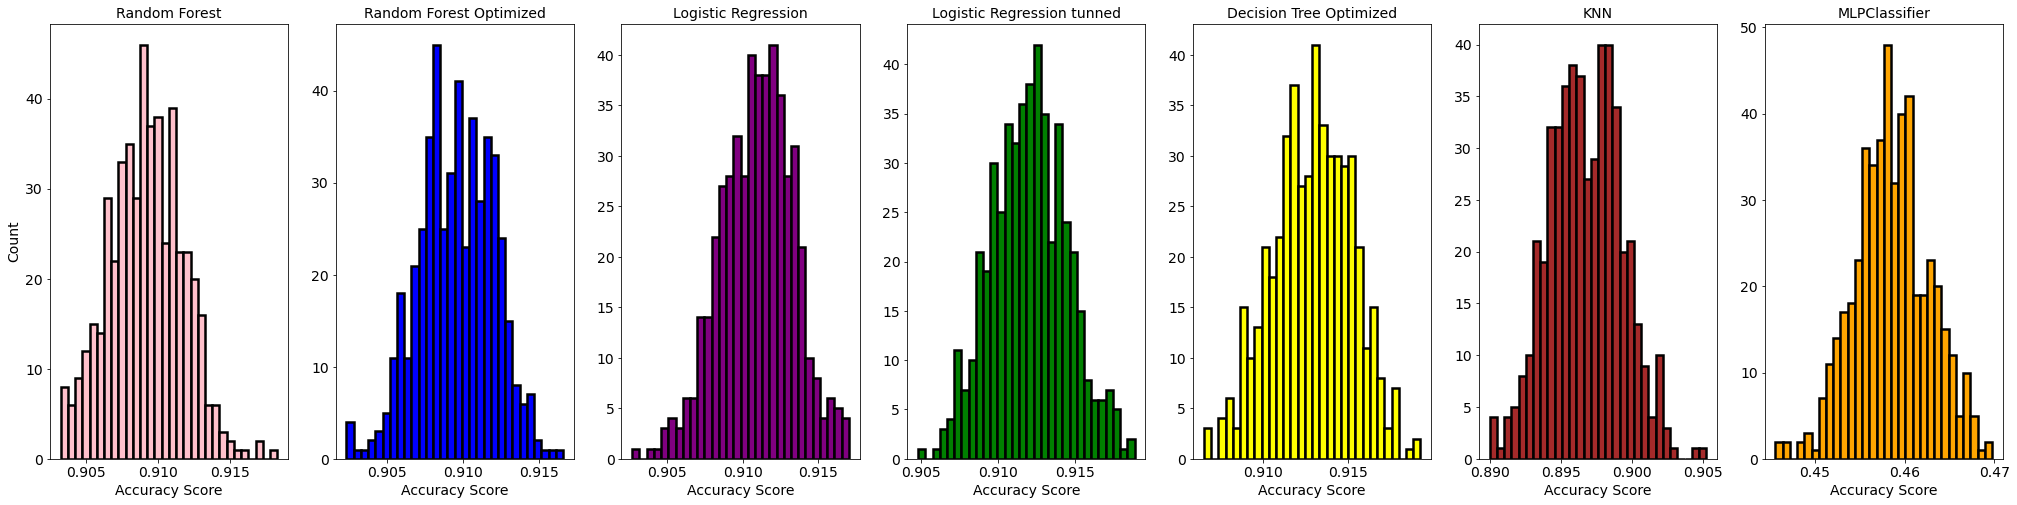

In [59]:
# Plotting our model bootstrapping

fig, axs = plt.subplots(ncols = 7, figsize = (35,8))
axs[0].set_title('Random Forest', fontsize = 14)
axs[1].set_title('Random Forest Optimized', fontsize = 14)
axs[2].set_title('Logistic Regression', fontsize = 14)
axs[3].set_title('Logistic Regression tunned', fontsize = 14)
axs[4].set_title('Decision Tree Optimized', fontsize = 14)
axs[5].set_title('KNN', fontsize = 14)
axs[6].set_title('MLPClassifier', fontsize = 14)
axs[0].set_xlabel('Accuracy Score', fontsize = 14)
axs[1].set_xlabel('Accuracy Score', fontsize = 14)
axs[2].set_xlabel('Accuracy Score', fontsize = 14)
axs[3].set_xlabel('Accuracy Score', fontsize = 14)
axs[4].set_xlabel('Accuracy Score', fontsize = 14)
axs[5].set_xlabel('Accuracy Score', fontsize = 14)
axs[6].set_xlabel('Accuracy Score', fontsize = 14)
axs[0].set_ylabel('Count', fontsize = 14)
axs[0].hist(finalDictionary['Random Forest'], bins = 30, edgecolor = 'black', linewidth = 2.5, color = 'pink')
axs[1].hist(finalDictionary['Random Forest Optimized'], bins = 30, edgecolor = 'black', linewidth = 2.5, color = 'blue')
axs[2].hist(finalDictionary['Logistic Regression'], bins = 30, edgecolor = 'black', linewidth = 2.5, color = 'purple')
axs[3].hist(finalDictionary['Logistic Regression tunned'], bins = 30, edgecolor = 'black', linewidth = 2.5, color = 'green')
axs[4].hist(finalDictionary['Decision Tree Optimized'], bins = 30, edgecolor = 'black', linewidth = 2.5, color = 'yellow')
axs[5].hist(finalDictionary['KNN'], bins = 30, edgecolor = 'black', linewidth = 2.5, color = 'brown')
axs[6].hist(finalDictionary['MLPClassifier'], bins = 30, edgecolor = 'black', linewidth = 2.5, color = 'orange')

